<a href="https://colab.research.google.com/github/JohanCarrillo/CUFICO-2018-2/blob/master/SeguimientoTTree/Johan_Carrillo-1214734681.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Johan Alexis Carrillo Toro - 1214734681
# With this notebook we will:
## 1. Install packages needed for root
## 2. Download a binary root that compiled in google drive "colaboratory" environement
## 3. Modify the PATH in order to tell python where to look for pyROOT
## 4. Finally, test ROOT installation with a simple example

##### Author: Jose Ruiz
##### Maintainer: Jose Ruiz
##### Developed at: Universidad de Antioquia


### 1. Install packages needed for root

In [0]:
!apt-get install git dpkg-dev cmake g++ gcc binutils libx11-dev libxpm-dev libxft-dev libxext-dev tar gfortran subversion

Reading package lists... Done
Building dependency tree       
Reading state information... Done
cmake is already the newest version (3.10.2-1ubuntu2).
libxext-dev is already the newest version (2:1.3.3-1).
libxft-dev is already the newest version (2.3.2-1).
libxpm-dev is already the newest version (1:3.5.12-1).
subversion is already the newest version (1.9.7-4ubuntu1).
binutils is already the newest version (2.30-21ubuntu1~18.04).
dpkg-dev is already the newest version (1.19.0.5ubuntu2.1).
g++ is already the newest version (4:7.3.0-3ubuntu2.1).
gcc is already the newest version (4:7.3.0-3ubuntu2.1).
gfortran is already the newest version (4:7.3.0-3ubuntu2.1).
git is already the newest version (1:2.17.1-1ubuntu0.4).
libx11-dev is already the newest version (2:1.6.4-3ubuntu0.1).
tar is already the newest version (1.29b-2ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


### 2. Mount the drive to get the root binary and untar it 

In [0]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
!ls "/content/drive/Team Drives/PyROOT_in_Google/"

BasicAnalysis.ipynb	  HistogrammingInROOT.ipynb    TrimmedTree.root
BasicPyROOTExample.ipynb  root_build_google_yikes.tar  TTreeExcercise.ipynb


In [0]:
!tar -xf /content/drive/Team\ Drives/PyROOT_in_Google/root_build_google_yikes.tar

In [0]:
!ls -ltrh

total 12K
drwxr-xr-x 44 root root 4.0K Sep 20 23:35 root_build
drwxr-xr-x  1 root root 4.0K Feb 19 17:17 sample_data
drwx------  4 root root 4.0K Feb 26 22:51 drive



### 3. Modify the PATH in order to tell python where to look for pyROOT


In [0]:
import sys
sys.path.append("/content/root_build/")
sys.path.append("/content/root_build/bin/")
sys.path.append("/content/root_build/include/")
sys.path.append("/content/root_build/lib/")

In [0]:
import ROOT

Welcome to JupyROOT 6.14/04


In [0]:
from array import array

In [0]:
MyTree = ROOT.TTree( 'tree1', 'tree para un par de dados' )

In [0]:
# Se crean tres arreglos de enteros
x = array( 'f', [ 0 ] )
y = array( 'f', [ 0 ] )
z = array( 'f', [ 0 ] )

In [0]:
# Con estos arreglos se crean las tres ramas
MyTree.Branch( 'x', x, 'x/F' )  # se crea la rama de nombre x, con los datos del arreglo x y se indica que es float
MyTree.Branch( 'y', y, 'y/F' )
MyTree.Branch( 'z', z, 'z/F' )

<ROOT.TBranch object ("z") at 0x4f1fb80>

In [0]:
import random

In [0]:
# Como no existe una libreria que permita restringir el valor de la gausiana para que este en intervalo [0, 10] lo que se va hacer es truncarla para guardar solo los valores dentro de este rango

def gauss_trunc(mu, sigma, inf, sup):
    # Esta funcion retorna un numero de la distribucion normal que esta en el intervalo [inf, sup]
  a = random.gauss(mu,sigma)
  while (inf <= a <= sup) == False:  # Genera números aleatorios de la distribucion hasta que encuentre uno entre inf y sup
    a = random.gauss(mu,sigma)
  return a

In [0]:
# Se rellenan los Branch con 10000 datos:

for i in range(10000):
  x[0] = gauss_trunc(5, 5, 0, 10)
  y[0] = gauss_trunc(6, 2, 0, 10)
  z[0] = random.uniform(0, 10)
  MyTree.Fill()

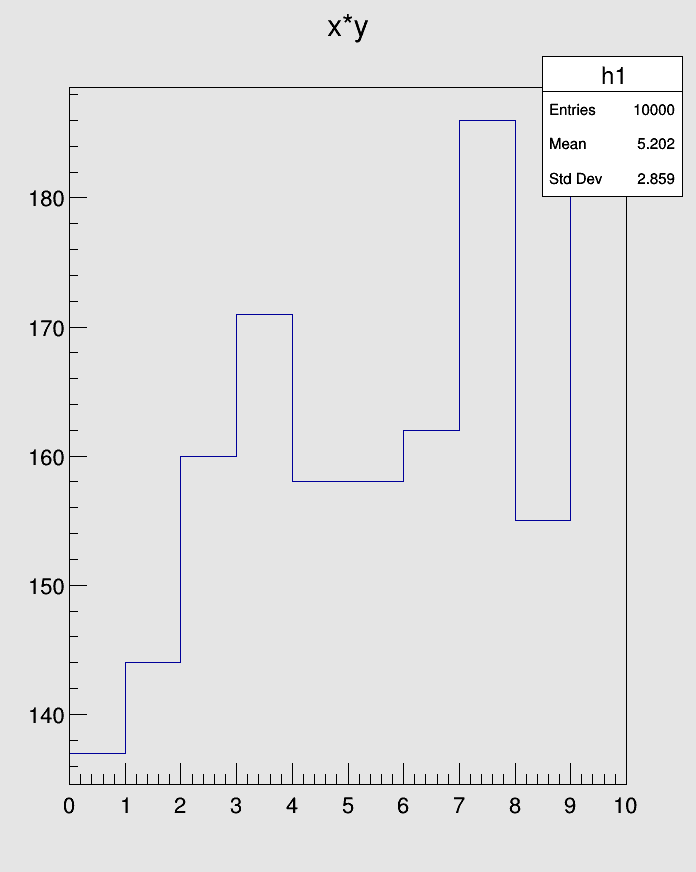

In [0]:
# Se crea el canvas
c1 = ROOT.TCanvas( 'c1', 'Seguimiento Final', 200, 10, 700, 900 )
c1.SetFillColor( 18 )

# Se dibuja el arbol para x*y
MyTree.Draw("x*y>>h1(10, 0, 10)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

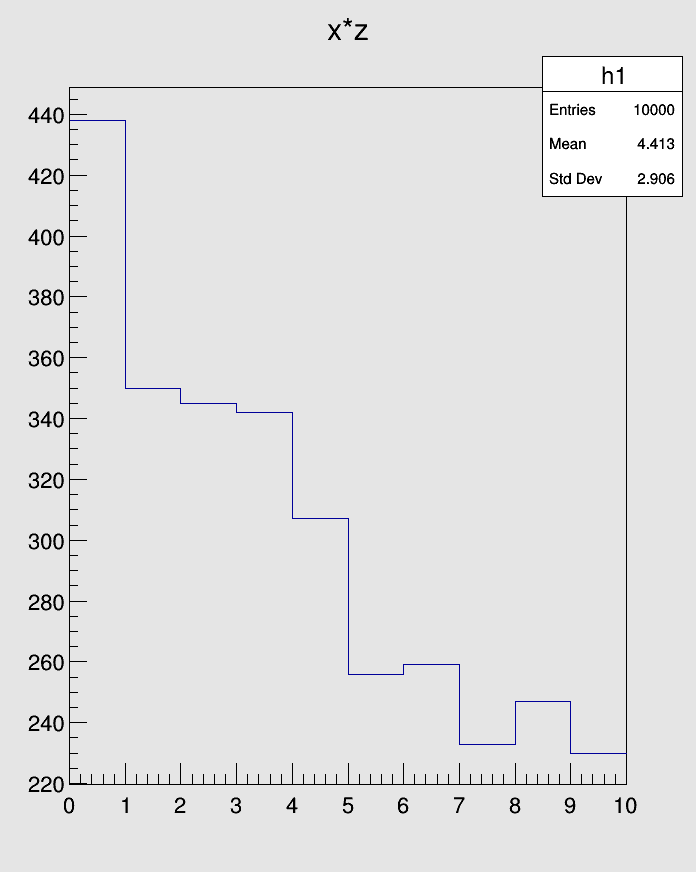

In [0]:
# Se dibuja el arbol para x*z
MyTree.Draw("x*z>>h1(10, 0, 10)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

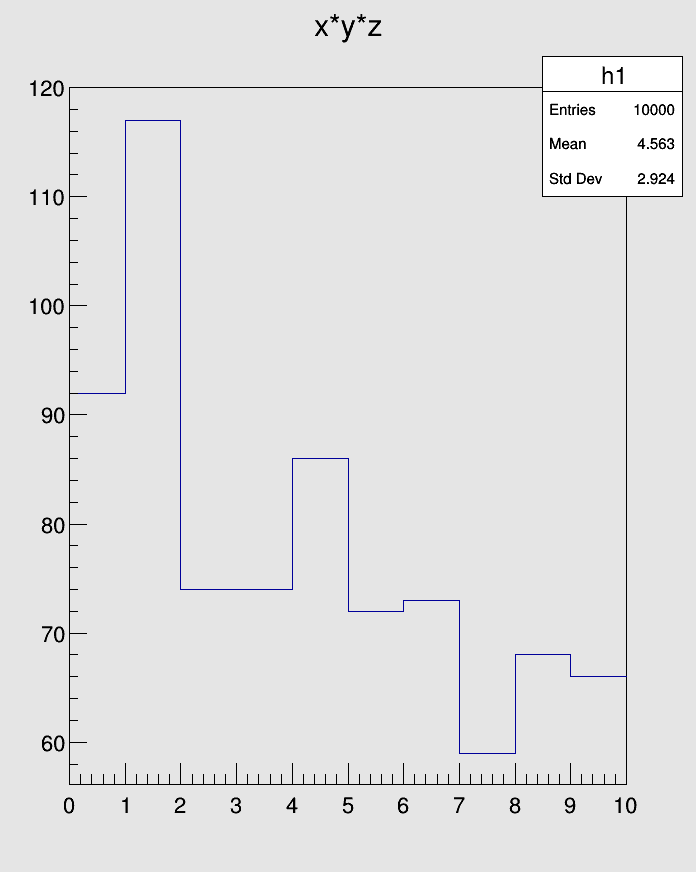

In [0]:
# Se dibuja el arbol para x*y*z
MyTree.Draw("x*y*z>>h1(10, 0, 10)")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

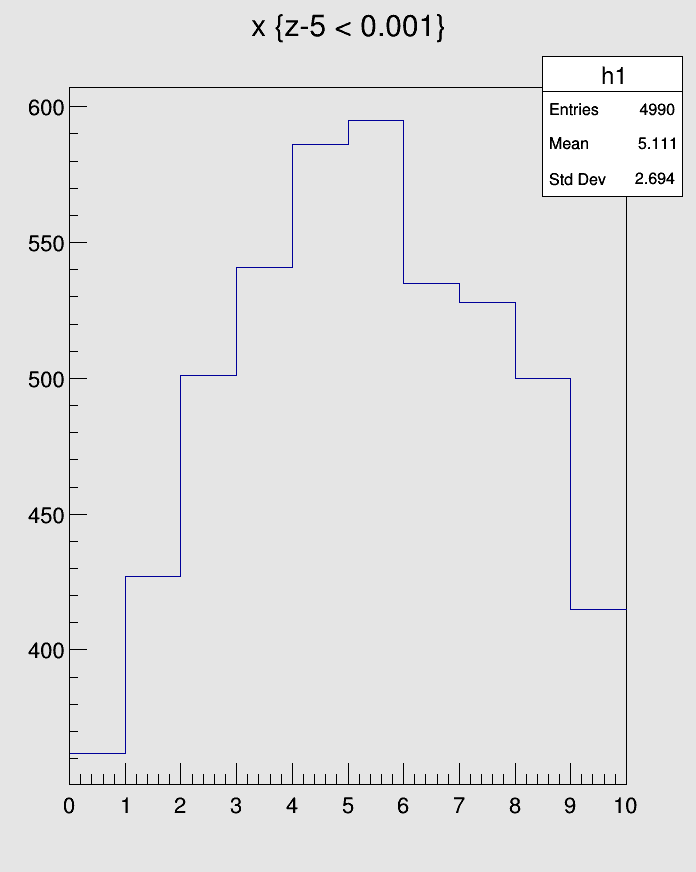

In [0]:
# Se cambia la condición de z==5 porque no hay ningún dato que concuerde exactamente con esta condición

MyTree.Draw("x>>h1(10, 0, 10)", "z-5 < 0.001")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

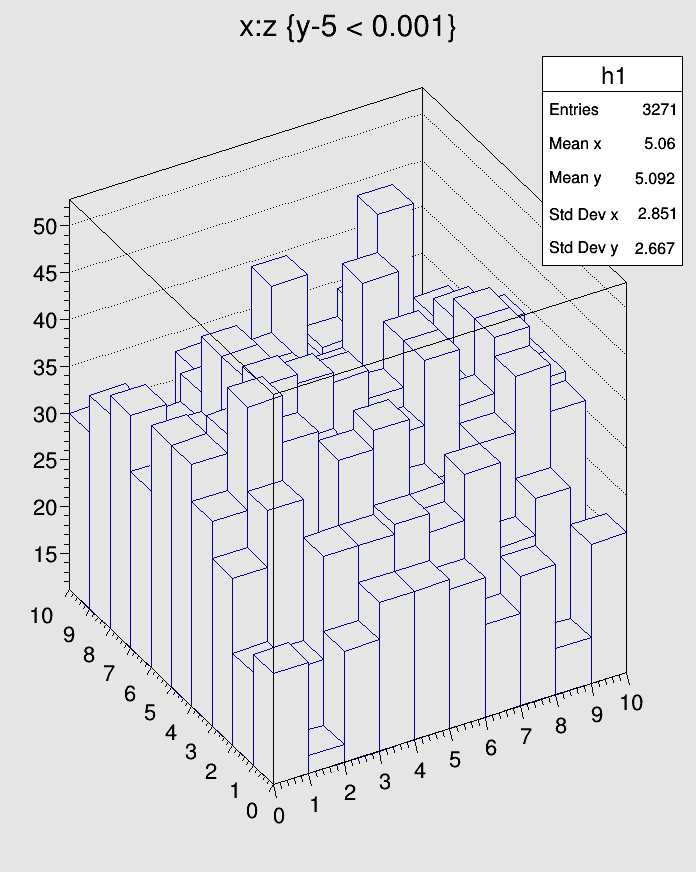

In [0]:
# Se dibuja x un histograma 3D para x y z cuando y->5

MyTree.Draw("x:z>>h1(10, 0, 10, 10, 0, 10)", "y-5 < 0.001", "lego")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()

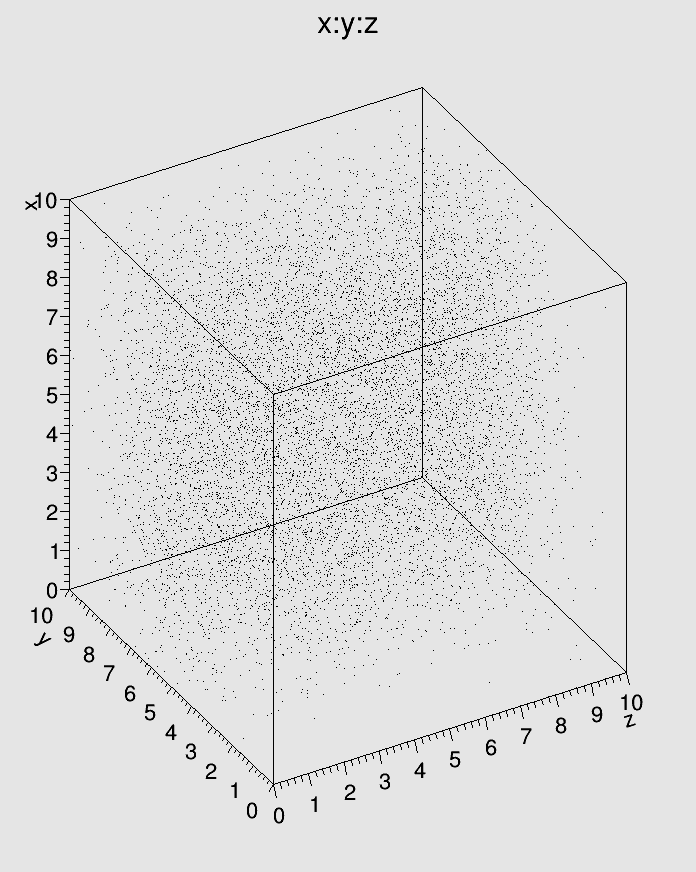

In [0]:
# Para dibujar los tres solo se puede un diagrama de dispersion

MyTree.Draw("x:y:z", "", "")
c1.Update()
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()